In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Play with digits

In [3]:
b = np.load("mnist.npz", allow_pickle=True)

In [4]:
b.files

['X', 'y']

**Question** Display and read the description of this data (attribute `DESCR`)

In [5]:
b['y'].shape

(70000,)

In [6]:
b['X'].shape

(70000, 784)

In [7]:
np.sqrt(784)

np.float64(28.0)

**Question** Call the data and target `X` and `y`. Split into `X_train`, `y_train`, `X_test`, `y_test` according to the instructions given in the description.

In [8]:
from sklearn.model_selection import train_test_split

X = b['X']
y = b['y']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/7), random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


You can view a few digits with this little code

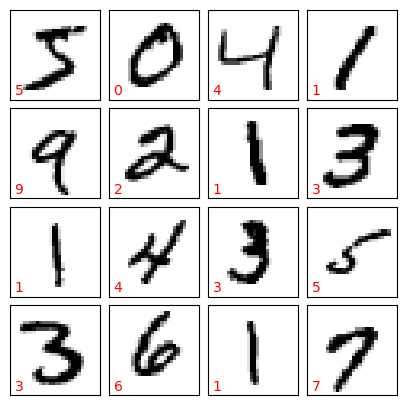

In [26]:
fig, axes = plt.subplots(4, 4, figsize=(5, 5),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw={'hspace':0.1, 'wspace':0.1})
for i,ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28,28), cmap='binary')
    ax.text(0.05, 0.05, str(y[i]),
            transform=ax.transAxes, 
            color='red')
plt.show()

**Question** Create 4 classifiers of the following classes. We will take 5 neighbors for the $k$-nearest neighbors, and a depth of 20 for the decision trees. Store them in a list `methods` for convenience.  

In [12]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [13]:
svc = SVC()
dtc = DecisionTreeClassifier(max_depth=20)
log_reg = LogisticRegression(max_iter=10000)
sgd_reg = SGDClassifier()
kneighbor = KNeighborsClassifier(n_neighbors=5)
naive = GaussianNB()

In [14]:
methods = [svc, dtc, log_reg, sgd_reg, kneighbor, naive]

We consider sizes from 100 to 4100 in increments of 1000. Next, we will take subsamples of `X_train` drawn at random from the sizes considered (you will play with the indices rather than the data!!).

    sizes = list(range(100, 5000, 1000)) 

In [15]:
sizes = list(range(100, 5000, 1000)) 
sizes

[100, 1100, 2100, 3100, 4100]

# Measure running times

**Question** Read the documentation of %timeit

In [30]:
#timeit?

**Question** Explain what the following instruction is doing

    r = %timeit -o -q -r1 -n1 mon_appel_de_fonction

*Answer:* Execute mon_appel_de_fonction 1 time in a loop and run the loop 1 time and take the average result. Do not print the result and return a result (TimeitResult) that can be stored in a variable.

-o: return a TimeitResult that can be stored in a variable to inspect
the result in more details.

-q: Quiet, do not print result.

-r<R>: number of repeats <R>, each consisting of <N> loops, and take the
average result.

-n<N>: execute the given statement <N> times in a loop. If <N> is not
provided, <N> is determined so as to get sufficient accuracy.

**Question** Try the following expression on some object instances
  
    <instance_of_classif_method>.__class__.__name__

In [17]:
svc.__class__.__name__

'SVC'

In [18]:
kneighbor.__class__.__name__

'KNeighborsClassifier'

In [19]:
naive.__class__.__name__

'GaussianNB'

In [20]:
log_reg.__class__.__name__

'LogisticRegression'

**Question** Using this, draw the following diagram:
- the execution time of the model training
- the execution time of the model application
  
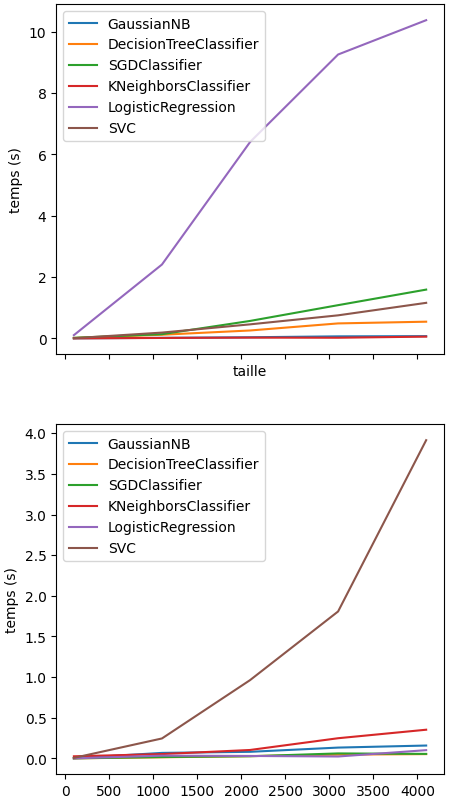

In each curve, **all models are trained on the same data**, which are subsamples of `X_train` randomly drawn from each size in the `sizes` list. 

In [21]:
training_times = {}
application_times = {}

In [25]:
for method in methods:
    model_name = method.__class__.__name__
    training_times[model_name] = []
    application_times[model_name] = []

    print(model_name)

    for size in sizes:
        indices = np.random.choice(len(X_train), size=size, replace=False)
        X_sub = X_train[indices]
        y_sub = y_train[indices]

        # Training time (fit)
        timeit_result = %timeit -o -q -r1 -n1 method.fit(X_sub, y_sub)
        time_spent = timeit_result.best
        training_times[model_name].append(time_spent)

        # Application time (predict)
        
        timeit_result = %timeit -o -q -r1 -n1 method.predict(X_test)
        time_spent = timeit_result.best
        application_times[model_name].append(time_spent)


SVC
DecisionTreeClassifier
LogisticRegression
SGDClassifier
KNeighborsClassifier
GaussianNB


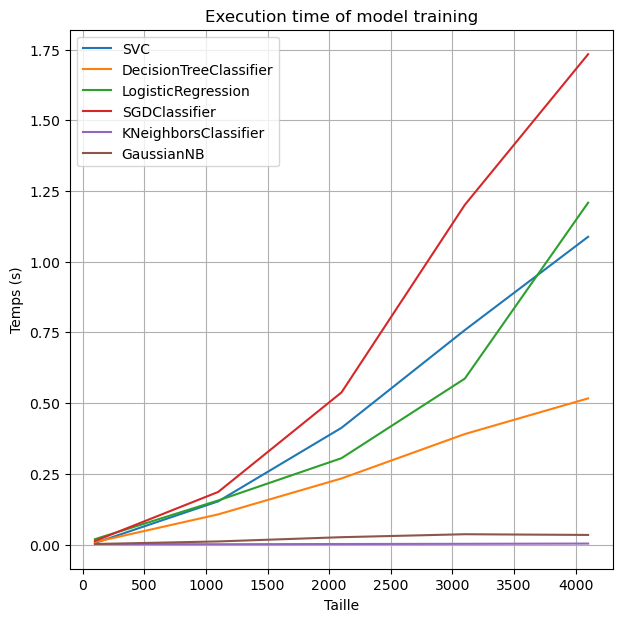

In [27]:
plt.figure(figsize=(7, 7))
for model_name, times in training_times.items():
    plt.plot(sizes, times, label=model_name)

plt.xlabel("Taille")
plt.ylabel("Temps (s)")
plt.title("Execution time of model training")
plt.legend()
plt.grid(True)
plt.show()

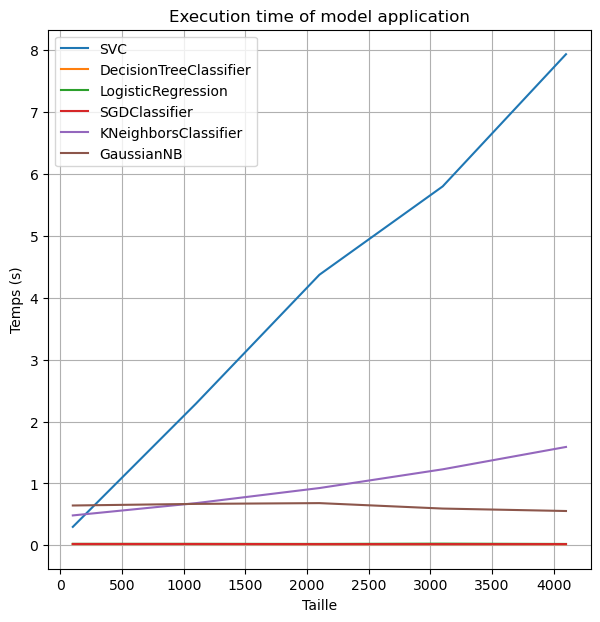

In [28]:
plt.figure(figsize=(7, 7))
for model_name, times in application_times.items():
    plt.plot(sizes, times, label=model_name)

plt.xlabel("Taille")
plt.ylabel("Temps (s)")
plt.title("Execution time of model application")
plt.legend()
plt.grid(True)
plt.show()

# Scores

**Question** Import `cross_val_score` and read the documentation

In [31]:
from sklearn.model_selection import cross_val_score

#cross_val_score?

**Question** Plot the following curves obtained with cross_val_score on the different sizes. 

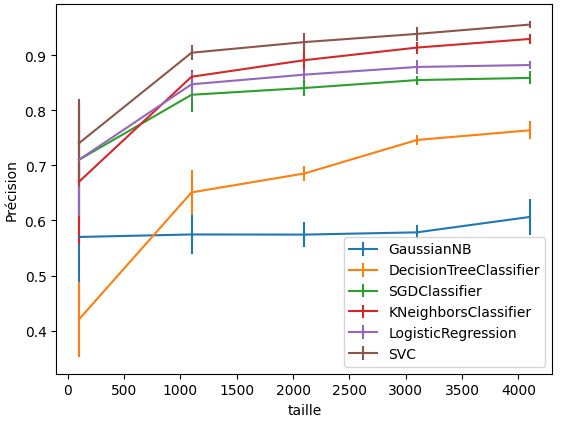

(You can try to get a prettier version :-) )

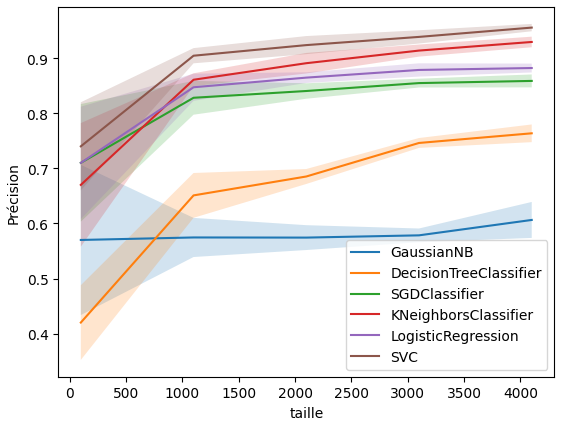

In [33]:
scores = {}

for method in methods:
    model_name = method.__class__.__name__
    scores[model_name] = []

    print(model_name)

    for size in sizes:
        indices = np.random.choice(len(X_train), size=size, replace=False)
        X_sub = X_train[indices]
        y_sub = y_train[indices]

        # Cross val score
        score = cross_val_score(method, X_sub, y_sub, cv=3)
        scores[model_name].append(np.mean(score))
        

SVC
DecisionTreeClassifier
LogisticRegression
SGDClassifier
KNeighborsClassifier
GaussianNB


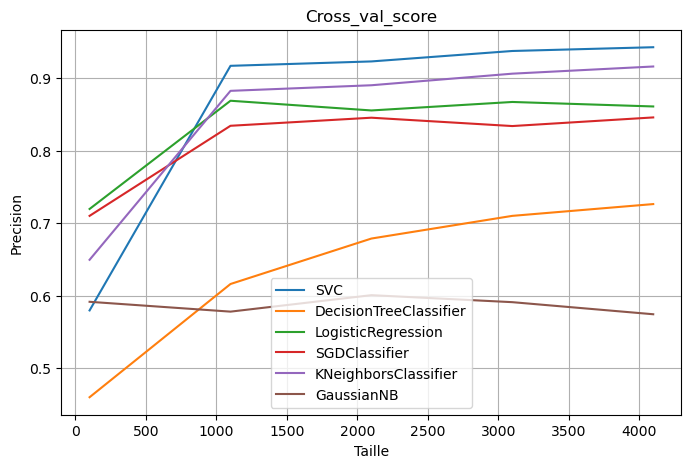

In [34]:
plt.figure(figsize=(8,5))
for model_name, score in scores.items():
    plt.plot(sizes, score, label=model_name)

plt.xlabel("Taille")
plt.ylabel("Precision")
plt.title("Cross_val_score")
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix

We change the classification problem into a binary problem of determining whether a digit is ‘3’.

In [35]:
y_train3 = (y_train == '3')
y_test3 = (y_test == '3')

**Question** Select 5000 random indices from X_train to work on a subsample (named `Xs`, `ys`). Split this subsample to obtain a training and validation sample. 

In [36]:
indices = np.random.choice(len(X_train), size=5000)
Xs = X_train[indices]
ys = y_train[indices]

In [37]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.33, random_state=42)

print(Xs_train.shape, Xs_test.shape, ys_train.shape, ys_test.shape)

(3350, 784) (1650, 784) (3350,) (1650,)


**Question** Train all classifiers on this subsample and calculate in a dictionary `pred` all predictions of each method on the validation sample. 

In [38]:
pred = {}

for method in methods:
    model_name = method.__class__.__name__
    pred[model_name] = []

    # Train on subsample
    method.fit(Xs_train, ys_train)

    # Prediction on validation sample

    pred[model_name] = method.predict(Xs_test)

**Question** Calculate the confusion matrices for `lr` and `sgd`. Also display the confusion matrices graphically. (`plot_confusion_matrix`)


In [39]:
from sklearn.metrics import confusion_matrix

lr_confusion_matrix = confusion_matrix(ys_test, pred[log_reg.__class__.__name__])
sgd_confusion_matrix = confusion_matrix(ys_test, pred[sgd_reg.__class__.__name__])

print(lr_confusion_matrix)

[[158   0   1   1   1   1   0   1   2   1]
 [  0 173   2   1   0   2   0   0   3   0]
 [  1   3 120   4   4   1   6   1   3   1]
 [  2   0   3 129   1   4   0   4   2   2]
 [  0   0   1   0 153   0   4   0   4  11]
 [  2   0   3  13   3 113   1   0  18   1]
 [  2   0   5   1   2   5 174   1   1   0]
 [  1   2   6   4   2   1   0 148   0   5]
 [  0   5   5   6   0   8   1   0 127   3]
 [  2   2   0   3   4   5   1   7   1 145]]


In [40]:
print(sgd_confusion_matrix)

[[158   0   2   0   1   1   1   1   1   1]
 [  0 169   4   1   0   4   2   0   1   0]
 [  1   1 124   3   0   2   5   1   5   2]
 [  2   0   3 127   0   6   0   5   3   1]
 [  0   0   2   0 146   0   5   2   6  12]
 [  4   0   4   6   3 114   5   0  17   1]
 [  2   1   4   0   1   2 177   1   3   0]
 [  1   2   5   0   2   1   0 148   0  10]
 [  0   6   3   7   0  12   4   0 122   1]
 [  2   0   1   0   3   5   1   9   4 145]]


In [41]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\nomin\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

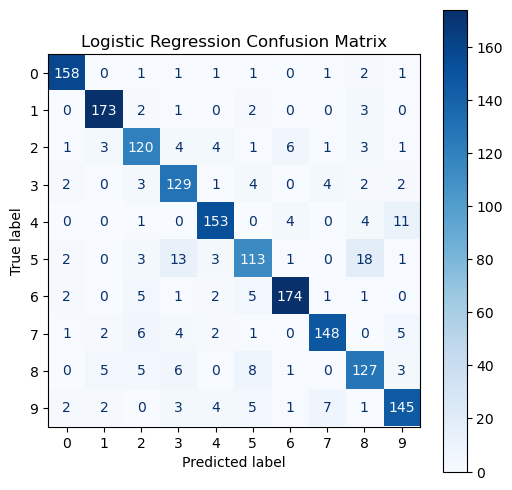

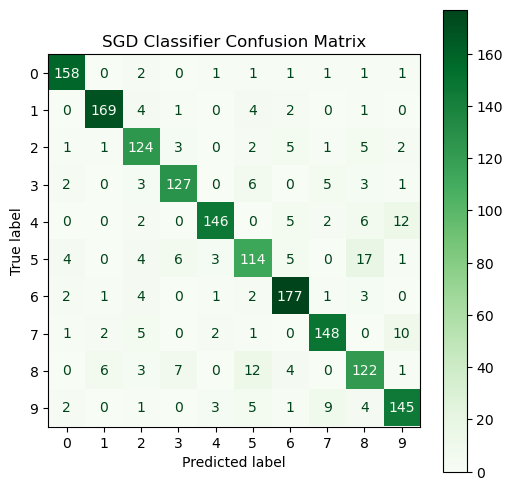

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

# LR
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    y_true=ys_test, 
    y_pred=pred[log_reg.__class__.__name__],
    ax=ax,
    cmap=plt.cm.Blues,
)
ax.set_title("Logistic Regression Confusion Matrix")
plt.show()

# SGD
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    y_true=ys_test, 
    y_pred=pred[sgd_reg.__class__.__name__],
    ax=ax,
    cmap=plt.cm.Greens,
)
ax.set_title("SGD Classifier Confusion Matrix")
plt.show()

**Question** By studying the confusion matrix with predictions in `pred[lr]`, calculate 1 - the error rate (accuracy), precision, and recall (without using `sklearn` functions).

By interpreting the problem as a multi-class problem, calculate the micro and macro average precision.

In [43]:
total = 0
TP = 0

for i in range(10): # len(lr_confusion_matrix) = 10
    total += np.sum(lr_confusion_matrix[i])
    TP += lr_confusion_matrix[i][i]
    
print(total)
print(TP)

1650
1440


In [44]:
#Accuracy : number of wrongly classified examples / total number of examples
accuracy = (total-TP) / total
accuracy

np.float64(0.12727272727272726)

In [45]:
# precision = tp / tp + fp (tp + fp = one column in the precision matrix)

# macro precision = average of all the precision (precision for each class)

macro_precision = 0

for i in range (10):
    
    tp = lr_confusion_matrix[i][i]
    s = np.sum(lr_confusion_matrix.T[i])
    macro_precision += tp/s

macro_precision = macro_precision/10
macro_precision

np.float64(0.8691837859062567)

In [46]:
# micro precision = all tps / all predicitons

micro_precision = TP/total
micro_precision

np.float64(0.8727272727272727)

In [47]:
# recall = tp / tp + fn (tp + fn = one row)
# recall macro

recall = 0

for i in range (10):
    
    tp = lr_confusion_matrix[i][i]
    s = np.sum(lr_confusion_matrix[i])
    recall += tp/s

recall = recall/10
recall

np.float64(0.8695682409528169)

**Question**  Display the same results now using the functions from `sklearn`. 

In [48]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

recall_score(ys_test, pred[log_reg.__class__.__name__], average='macro')

0.8695682409528169

In [49]:
precision_score(ys_test, pred[log_reg.__class__.__name__], average='macro')

0.8691837859062568

In [50]:
precision_score(ys_test, pred[log_reg.__class__.__name__], average='micro')

0.8727272727272727

In [51]:
accuracy_score(ys_test, pred[log_reg.__class__.__name__])

0.8727272727272727

**Question** Use `classification_report` to display the results on the `valid` sample using the `lr` and `sgd` methods.

In [52]:
from sklearn.metrics import classification_report

print(classification_report(ys_test, pred[log_reg.__class__.__name__]))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       166
           1       0.94      0.96      0.95       181
           2       0.82      0.83      0.83       144
           3       0.80      0.88      0.83       147
           4       0.90      0.88      0.89       173
           5       0.81      0.73      0.77       154
           6       0.93      0.91      0.92       191
           7       0.91      0.88      0.89       169
           8       0.79      0.82      0.80       155
           9       0.86      0.85      0.86       170

    accuracy                           0.87      1650
   macro avg       0.87      0.87      0.87      1650
weighted avg       0.87      0.87      0.87      1650



In [53]:
print(classification_report(ys_test, pred[sgd_reg.__class__.__name__]))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       166
           1       0.94      0.93      0.94       181
           2       0.82      0.86      0.84       144
           3       0.88      0.86      0.87       147
           4       0.94      0.84      0.89       173
           5       0.78      0.74      0.76       154
           6       0.89      0.93      0.91       191
           7       0.89      0.88      0.88       169
           8       0.75      0.79      0.77       155
           9       0.84      0.85      0.85       170

    accuracy                           0.87      1650
   macro avg       0.86      0.86      0.86      1650
weighted avg       0.87      0.87      0.87      1650



# Decision Function and ROC Curve

**Question** Display the top 10 scores calculated by `lr.decision_function` and the top 10 labels from the validation sample.

In [78]:
decision_scores = log_reg.decision_function(Xs_test)

max_scores = np.max(np.abs(decision_scores), axis=1)

top_10_indices = np.argsort(max_scores)[-10:][::-1]
 
top_scores_values = max_scores[top_10_indices]
top_labels = y_test[top_10_indices]

for i in range(10):
    score = top_scores_values[i]
    label = top_labels[i]
    
    full_scores = decision_scores[top_10_indices[i]]
    predicted_class = np.argmax(full_scores)

    print(f"{i+1}.")
    print(f"  Top Score: {score:.3f}")
    print(f"  True Label: {label}")
    print(f"  Predicted Label: {predicted_class}")

1.
  Top Score: 231.579
  True Label: 6
  Predicted Label: 0
2.
  Top Score: 213.589
  True Label: 6
  Predicted Label: 6
3.
  Top Score: 190.009
  True Label: 6
  Predicted Label: 2
4.
  Top Score: 188.212
  True Label: 0
  Predicted Label: 0
5.
  Top Score: 185.951
  True Label: 4
  Predicted Label: 0
6.
  Top Score: 185.806
  True Label: 5
  Predicted Label: 0
7.
  Top Score: 185.638
  True Label: 9
  Predicted Label: 0
8.
  Top Score: 184.731
  True Label: 3
  Predicted Label: 0
9.
  Top Score: 180.626
  True Label: 7
  Predicted Label: 0
10.
  Top Score: 180.626
  True Label: 0
  Predicted Label: 0


**Question** Using `precision_recall_curve` on the values of the decision function of `lr`, draw the following graph 

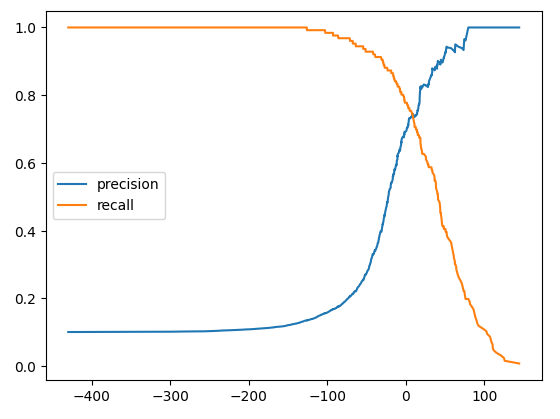

In [113]:
decision_scores = log_reg.decision_function(X_test)

# Define target class string
target_class = '1'
class_index = 1

scores_target = decision_scores[:, class_index] 

y_test_binary = (y_test == target_class).astype(int)

precision, recall, thresholds = precision_recall_curve(y_test_binary, scores_target)

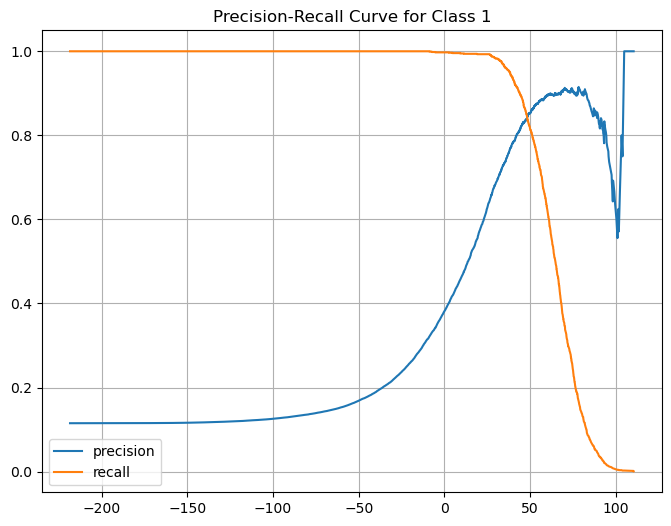

In [116]:
plt.figure(figsize=(8, 6))

plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')

plt.legend()
plt.grid(True)
plt.title(f"Precision-Recall Curve for Class {target_class}")
plt.show()

**Question** Interpret it, especially the values at the ends of the graph.

*Réponse* The graph shows the trade-off between the quality of the model's positive predictions (Precision) and its ability to find all positive cases (Recall) as it moves the Decision Threshold (the confidence score needed to classify a sample as positive).

The X-axis is the Threshold (Decision Function Value). As this threshold moves left (low/negative score), the model is lenient, or less strict. When it moves right (high/positive score), the model is more strict.

The vertical axis is a ratio from 0 to 1 (or 0% to 100%), measuring the effectiveness of the classification.

The right end of the graph represents setting a very high threshold, meaning the model only predicts Class 1 when it is extremely confident. Here precision is high, nearing 1. Because the model is so strict, any prediction it makes as "Class 1" is almost certainly correct. But recall is low. The model is so cautious that it misses most of the true Class 1 samples that fall just below the high threshold.

**Question** Now use `PrecisionRecallDisplay` to plot the precision versus recall curve for `lr`. Interpret this result.

<Figure size 700x600 with 0 Axes>

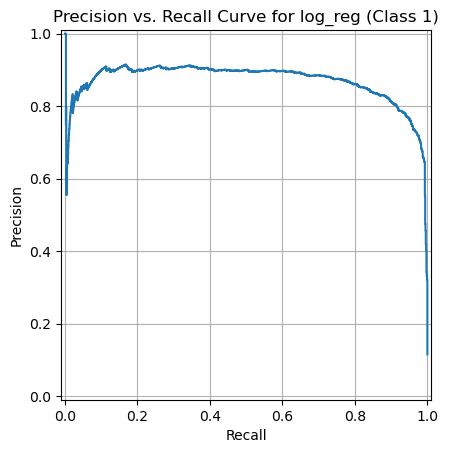

In [118]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_binary, scores_target)


plt.figure(figsize=(7, 6))

display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot() 

plt.title(f"Precision vs. Recall Curve for log_reg (Class {target_class})")
plt.grid(True)
plt.show()

*Réponse interprétation :* The Precision-Recall curve directly shows the trade-off when classifying the target digit (1) with the Logistic Regression model. The x-axis represents recall and  y-axis represents precision.

The curve is high and stays close to the top-right corner, indicating excellent performance for classifying digit 1. But to reach 100% Recall (finding every single 1s), the model has to become so lenient that it accepts many incorrect samples. As a result, precision drops sharply, showing that achieving perfect recall significantly compromises the trustworthiness of the predictions.

The sweet spot is the point on the curve that balances the two metrics, where the trade-off is most favorable.

**Question** Use `RocCurveDisplay.from_estimator` to display the ROC curve.

<Figure size 700x600 with 0 Axes>

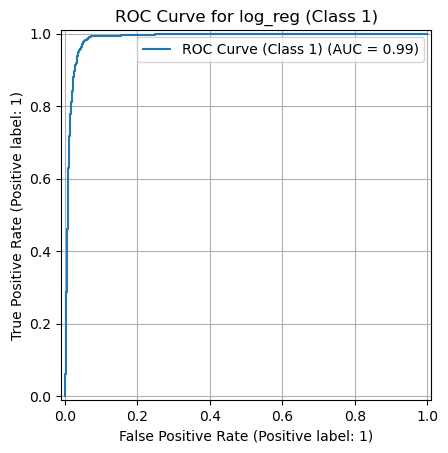

In [127]:
from sklearn.metrics import RocCurveDisplay, roc_curve

target_class = '1'

decision_scores = log_reg.decision_function(X_test)
class_index = np.where(log_reg.classes_ == target_class)[0][0] 
scores_target = decision_scores[:, class_index]
y_true_binary = (y_test == target_class).astype(int)


plt.figure(figsize=(7, 6))

RocCurveDisplay.from_predictions(
    y_true=y_true_binary,     # true binary labels (1s and 0s)
    y_pred=scores_target,     # scores for the positive class (Class 1)
    name=f"ROC Curve (Class {target_class})", 
    pos_label=1               # positive class label is 1
)

plt.title(f"ROC Curve for log_reg (Class {target_class})")
plt.legend()
plt.grid(True)
plt.show()